In [23]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [10]:
# Path to image folder
images = 'Hematoxylin'

# Path to CSV file
file_csv = 'dev_data_2025.csv'

In [11]:
df = pd.read_csv(file_csv)
print(df.head())

     imageID       label cell_shape         nucleus_shape cytoplasm_vacuole
0  Img_00001  Lymphocyte      round     unsegmented-round                no
1  Img_00002    Monocyte  irregular  unsegmented-indented                no
2  Img_00003    Monocyte  irregular             irregular               yes
3  Img_00004    Basophil      round  segmented-multilobed                no
4  Img_00005  Neutrophil      round      unsegmented-band                no


In [16]:
df.columns[0]

'imageID'

In [20]:
IMG_SIZE = (224, 224)  # Resize to 224x224 for pretrained CNNs

def load_and_preprocess_image(file_name, image_folder=images):
    img_path = os.path.join(image_folder, file_name + '.jpg')  # Append .jpg if not in CSV
    img = image.load_img(img_path, target_size=IMG_SIZE)       # Resize
    img_array = image.img_to_array(img)                        # Convert to numpy array
    img_array = img_array / 255.0                              # Normalize to [0,1]
    return img_array


In [21]:
# Load all images
X = np.array([load_and_preprocess_image(f) for f in df['imageID']])
print('Images shape:', X.shape)


Images shape: (5000, 224, 224, 3)


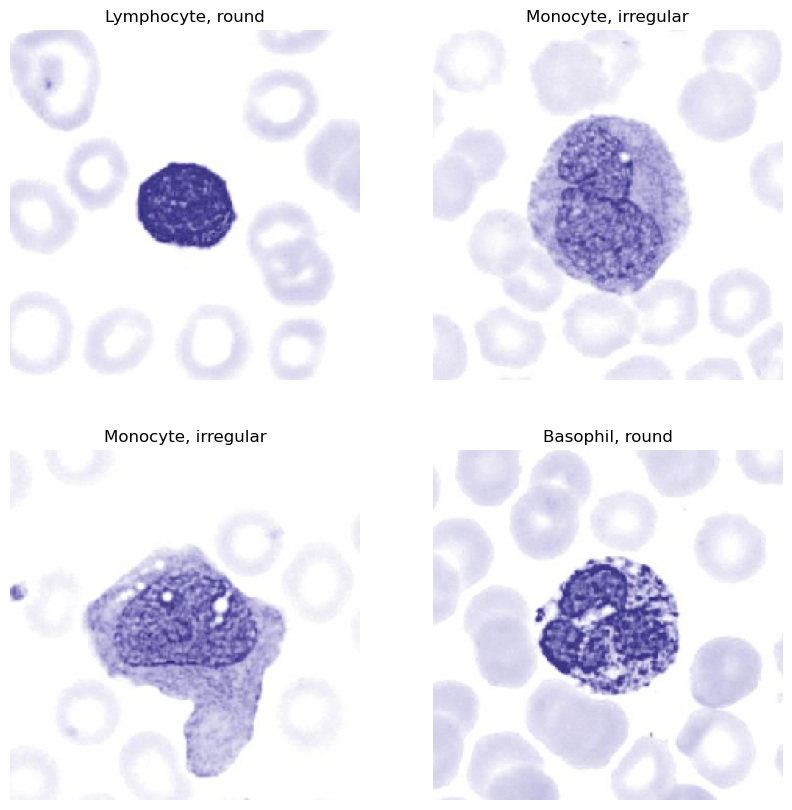

In [24]:
# Plot 4 sample images
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(X[i].astype('float32'))
    plt.title(f"{df['label'][i]},{df['nucleus_shape'][i]},{df['cytoplasm_vacuole'][i]} {df['cell_shape'][i]}")
    plt.axis('off')
plt.show()
